In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [184]:
#Lectura del CSV bike_train

df = pd.read_excel('bike_train.xlsx')

Análisis exploratorio de los datos

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [186]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [187]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [188]:
df.instant.nunique()

11999

In [189]:
df.dteday.nunique()

506

In [190]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [191]:
df.yr.unique()

array([0, 1], dtype=int64)

In [192]:
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [193]:
df.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [194]:
df.holiday.unique()

array([0, 1], dtype=int64)

In [195]:
df.weekday.unique()  #el día 0 es domingo, el día 6 es sábado

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [196]:
df.workingday.unique()

array([0, 1], dtype=int64)

In [197]:
df.weathersit.unique()

array([1, 2, 3, 4], dtype=int64)

In [198]:
correlaciones=df.corr().loc["cnt"]

In [199]:
correlaciones.sort_values(ascending=False, inplace=True)

In [200]:
correlaciones_abs=abs(correlaciones)

In [201]:
correlaciones_abs.sort_values(ascending=False, inplace=True)

In [202]:
correlaciones_abs

cnt           1.000000
registered    0.968540
casual        0.702414
hr            0.396698
temp          0.395743
atemp         0.395234
hum           0.303672
instant       0.229814
yr            0.156960
weathersit    0.149848
season        0.111369
windspeed     0.094791
mnth          0.073431
holiday       0.030304
workingday    0.025132
weekday       0.022618
Name: cnt, dtype: float64

En base a lo observado, en primera instancia realizaré un modelo de regresión lineal teniendo en cuenta las siguientes features:

(números en valores absolutos)

Registered: Correlación de 0.97   
Casual: Correlación de 0.70  
Hr: correlación de 0.40  
Temp: Correlación de 0.40  
Hum: Correlación de 0.30  
Weathersit: Correlación de 0.15  
Season: Correlación de 0.11  
Windspeed: Correlación de 0.09  

Por lo pronto, no utilizaré más features, ya que los valores restantes son muy bajos.

Aclaraciones: 

-Utilizo temp en lugar de atemp, ya que entre sí tienen una correlación de 0.99, por lo que es incorrecto usar ambas.  
-No utilizo el año porque me parece una generalización muy amplia que puede sesgar el resultado  
-Descarto la variable instant porque es sólo un número que crece, podría interpretarse como un proxy de la fecha pero de todas formas me parece incorrecto usarla.




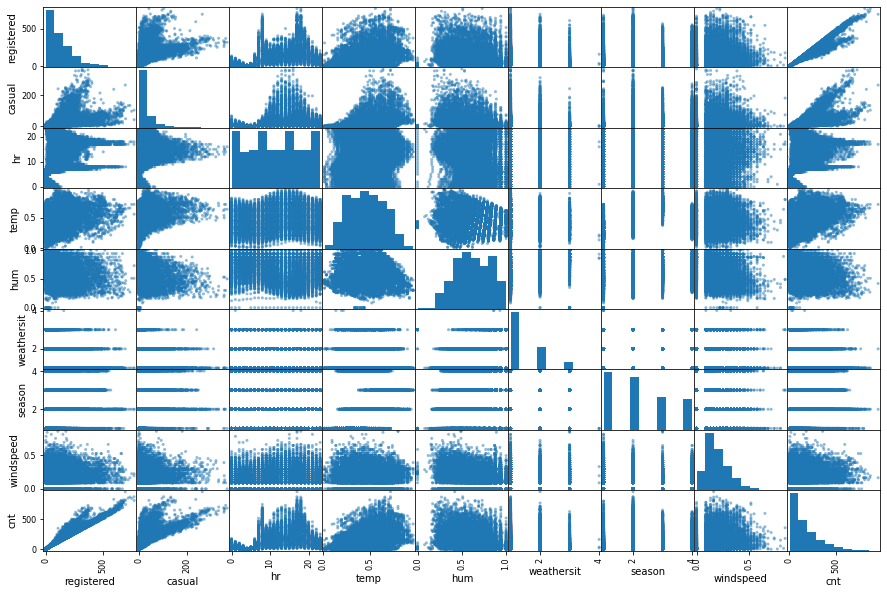

In [203]:
#Grafico la relación entre las variables mencionadas

pd.plotting.scatter_matrix(df[['registered', 'casual', 'hr', 'temp', 'hum', 'weathersit', 'season', 'windspeed', 'cnt']],figsize = (15,10))
plt.show()

In [204]:
#Como weathersit y season son variables categóricas, voy a utilizar dummies para su tratamiento

In [205]:
clima=pd.get_dummies(df.weathersit)
clima=clima.rename(columns={1: "clima_despejado", 2:"clima_nublado", 3:"clima_nieve", 4:"clima_lluvia"})  
estacion=pd.get_dummies(df.season)
estacion=estacion.rename(columns={1:"estacion_primavera", 2:"estacion_verano", 3:"estacion_otoño", 4:"estacion_invierno"})  #todo 0 es primavera

In [206]:
df= df.drop(["season", "weathersit"],axis=1)
df=pd.concat([df, clima, estacion], axis=1)

In [207]:
df.corr().loc["cnt"].sort_values()

hum                  -0.303672
estacion_primavera   -0.211014
clima_nieve          -0.136480
clima_nublado        -0.045067
holiday              -0.030304
estacion_invierno    -0.017715
clima_lluvia         -0.008802
weekday               0.022618
workingday            0.025132
mnth                  0.073431
estacion_otoño        0.090982
windspeed             0.094791
clima_despejado       0.123063
estacion_verano       0.153673
yr                    0.156960
instant               0.229814
atemp                 0.395234
temp                  0.395743
hr                    0.396698
casual                0.702414
registered            0.968540
cnt                   1.000000
Name: cnt, dtype: float64

In [208]:
X=df.drop(['dteday','cnt', 'instant', 'yr', 'mnth', 'weekday', 'workingday', 'holiday', 'atemp', 'casual', 'registered'], axis=1)

In [209]:
y=df.cnt

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [211]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [212]:
y_test_pred = lr.predict(X_test)
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred, squared=False))

Error en datos de test: 120.09371884998224


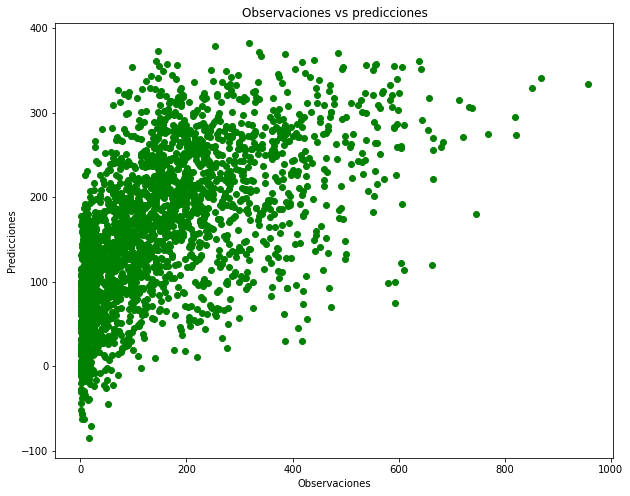

In [213]:
plt.figure(figsize = (10,8))
plt.axes()
plt.scatter(y_test, y_test_pred,  color='green')
plt.gca().update(dict(title='Observaciones vs predicciones', xlabel='Observaciones', ylabel='Predicciones'))

plt.show()

A continuación voy a predecir la variable cnt en el dataset bike_test

In [214]:
df2=pd.read_excel("bike_test.xlsx")

In [215]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700


In [216]:
clima2=pd.get_dummies(df2.weathersit)

In [217]:
clima2=clima2.rename(columns={1: "clima_despejado", 2:"clima_nublado", 3:"clima_nieve", 4:"clima_lluvia"})  

In [218]:
estacion2=pd.get_dummies(df2.season)

In [219]:
estacion2=estacion2.rename(columns={1:"estacion_primavera", 2:"estacion_verano", 3:"estacion_otoño", 4:"estacion_invierno"})

In [220]:
df2= df2.drop(["season", "weathersit"],axis=1)
df2=pd.concat([df2, clima2, estacion2], axis=1)

In [221]:
X_test2=df2.drop(['dteday', 'instant', 'yr', 'mnth', 'weekday', 'atemp', 'workingday', 'holiday'], axis=1)

In [222]:
X_test2["clima_lluvia"]=0

In [223]:
y_test_pred2 = lr.predict(X_test2)

c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [224]:
predicciones=pd.DataFrame(y_test_pred2)

In [225]:
predicciones=predicciones.rename(columns={0:"pred"})

In [226]:
predicciones.to_csv('dfrankram.csv', index=False)